In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("./datatran2021.csv", sep = ';', encoding="ISO-8859-1")
# data.head()

In [ ]:
data.shape

(64539, 30)

# Seleção do estado
Seção utilizada para filtrar os dados do estado de São Paulo - SP.

In [ ]:
data = data.drop (data[data['uf'] != 'SP'].index)

In [ ]:
data.shape

(4300, 30)

## Identificação de dados nulos
Está seção é responsável listar e remover a linha que contém alguma informação nula.

In [ ]:
data[data.isnull().any(axis=1)]
data.isnull().sum()

id                        0
data_inversa              0
dia_semana                0
horario                   0
uf                        0
br                        8
km                        8
municipio                 0
causa_acidente            0
tipo_acidente             0
classificacao_acidente    0
fase_dia                  0
sentido_via               0
condicao_metereologica    0
tipo_pista                0
tracado_via               0
uso_solo                  0
pessoas                   0
mortos                    0
feridos_leves             0
feridos_graves            0
ilesos                    0
ignorados                 0
feridos                   0
veiculos                  0
latitude                  0
longitude                 0
regional                  0
delegacia                 0
uop                       1
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.shape

(4292, 30)

## Salvando o resultado do filtro
Salva o resultado do filtro em um novo arquivo.

In [ ]:
data.to_csv('dataset_SP_2021.csv',  sep = ';', index=False, encoding="ISO-8859-1")

# Tipos de acidentes de trânsito

In [ ]:
data.columns

Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km',
       'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional',
       'delegacia', 'uop'],
      dtype='object')

In [ ]:
data['tipo_acidente'].value_counts()

Colisão traseira                  1092
Colisão com objeto                 575
Colisão lateral mesmo sentido      518
Tombamento                         485
Saída de leito carroçável          393
Atropelamento de Pedestre          246
Queda de ocupante de veículo       237
Colisão transversal                185
Capotamento                        137
Engavetamento                      115
Incêndio                           109
Colisão frontal                     70
Atropelamento de Animal             38
Colisão lateral                     34
Colisão lateral sentido oposto      25
Eventos atípicos                    19
Derramamento de carga               14
Name: tipo_acidente, dtype: int64

In [ ]:
dict_tipo_acidente = dict(data['tipo_acidente'].value_counts())

In [ ]:
dict_tipo_acidente.keys()

dict_keys(['Colisão traseira', 'Colisão com objeto', 'Colisão lateral mesmo sentido', 'Tombamento', 'Saída de leito carroçável', 'Atropelamento de Pedestre', 'Queda de ocupante de veículo', 'Colisão transversal', 'Capotamento', 'Engavetamento', 'Incêndio', 'Colisão frontal', 'Atropelamento de Animal', 'Colisão lateral', 'Colisão lateral sentido oposto', 'Eventos atípicos', 'Derramamento de carga'])

In [ ]:
dict_tipo_acidente.values()

dict_values([1092, 575, 518, 485, 393, 246, 237, 185, 137, 115, 109, 70, 38, 34, 25, 19, 14])

## Gráfico de barra

In [ ]:
list_tipos_acidentes_keys = list(dict_tipo_acidente.keys())

In [ ]:
list_tipos_acidentes_values = list(dict_tipo_acidente.values())

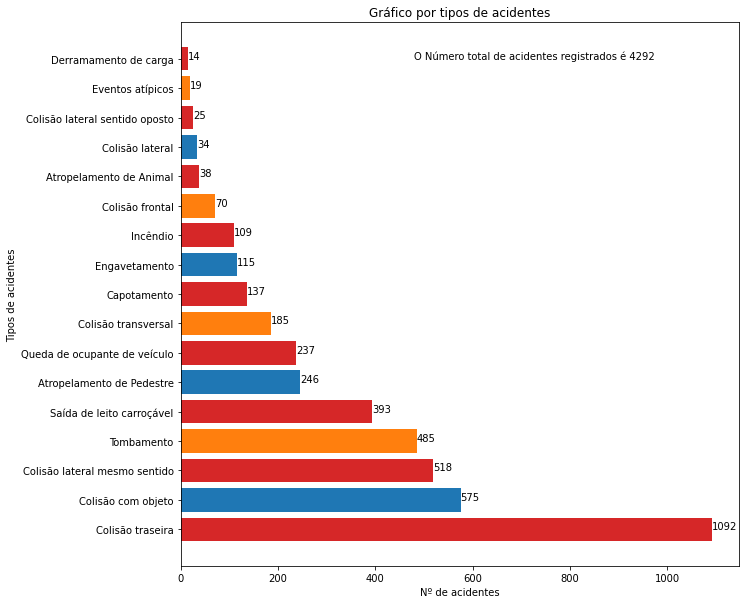

In [ ]:
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']
plt.figure(figsize=(10,10))

plt.barh(list_tipos_acidentes_keys, list_tipos_acidentes_values, 
         color=bar_colors, height = 0.8)

plt.xlabel('Nº de acidentes')
plt.ylabel('Tipos de acidentes')
plt.title('Gráfico por tipos de acidentes')

for index, value in enumerate(list_tipos_acidentes_values): 
    plt.text(value, index, str(value))
    ultima_posicao = index


plt.text(ultima_posicao*30, ultima_posicao, f"O Número total de acidentes registrados é {data.shape[0]}")


plt.show()

# Classificação dos acidentes de trânsito

In [ ]:
data['classificacao_acidente'].value_counts()

Com Vítimas Feridas    3283
Sem Vítimas             806
Com Vítimas Fatais      203
Name: classificacao_acidente, dtype: int64

## Gráfico de Barra

# Condições meteorológicas dos acidentes de trânsito

In [ ]:
data['condicao_metereologica'].value_counts()

Céu Claro           2358
Nublado              897
Chuva                450
Sol                  262
Garoa/Chuvisco       244
Ignorado              48
Nevoeiro/Neblina      28
Vento                  5
Name: condicao_metereologica, dtype: int64

## Gráfico de Barra